In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# initialize the height vector
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T

# initialize the weight vector
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

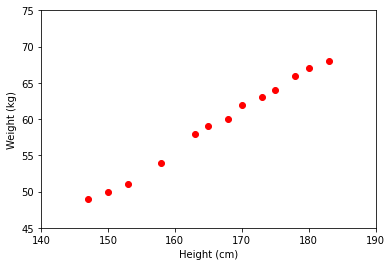

In [ ]:
plt.plot(X, y, 'ro')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.axis([140, 190, 45, 75])
plt.show()

w =  [[-33.73541021]
 [  0.55920496]]
[145. 185.]


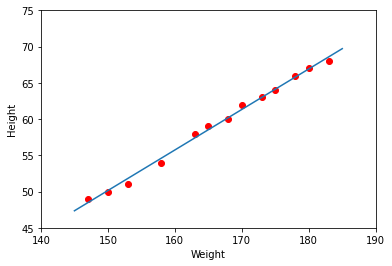

In [ ]:
# built Xbar
xbar = np.ones((X.shape[0],X.shape[1]))
xbar = np.hstack((xbar, X))

# Calculating weight of the fitting line
A = xbar.T.dot(xbar)
b = xbar.T.dot(y)
w = np.linalg.pinv(A).dot(b)
print("w = ", w)

# Prepare the fitting line
b = w[0,0]
w = w[1,0]
x0 = np.linspace(145, 185, 2)
y0 = w*x0 + b

print(x0)

plt.plot(X,y,'ro')
plt.plot(x0,y0)
plt.axis([140,190, 45, 75])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [ ]:
y1 = w*155+b
y2 = w*160+b
print("Predict weight of person with height 155cm: %.2f (kg), real number: 52(kg)"%(y1))
print("Predict weight of person with height 160cm: %.2f (kg), real number: 56(kg)"%(y2))

Predict weight of person with height 155cm: 52.94 (kg), real number: 52(kg)
Predict weight of person with height 160cm: 55.74 (kg), real number: 56(kg)


In [ ]:
from sklearn import datasets, linear_model

# fit_intercept = False for calculating the bias
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(xbar, y)

print('Solution found by skilearn: ', regr.coef_)
print('Solution found by (5)', w.T)

Solution found by skilearn:  [[-33.73541021   0.55920496]]
Solution found by (5) 0.5592049619395705


DO AGAIN

In [ ]:
# initialize the height vector
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T

# initialize the weight vector
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

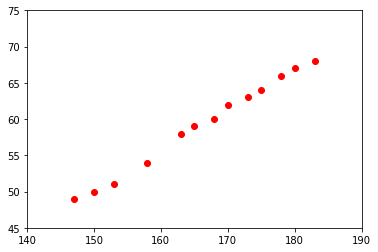

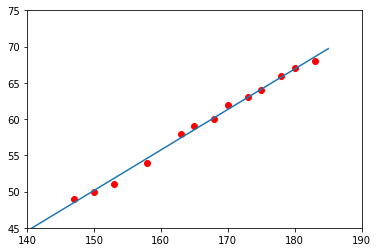

In [ ]:

ones = np.ones((X.shape[0], 1), dtype = np.uint8)
Xbar = np.hstack((ones, X))

A = np.dot(Xbar.T, Xbar)
B = np.dot(Xbar.T, y)
ws = np.dot(np.linalg.pinv(A), B)

b = ws[0,0]
w = ws[1,0]

plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.show()

x0 = np.linspace(140,185, 2)
y0 = w*x0+b
plt.plot(X, y, 'ro')
plt.plot(x0,y0)
plt.axis([140, 190, 45, 75])
plt.show()

[[3.97141814]
 [2.96978887]]


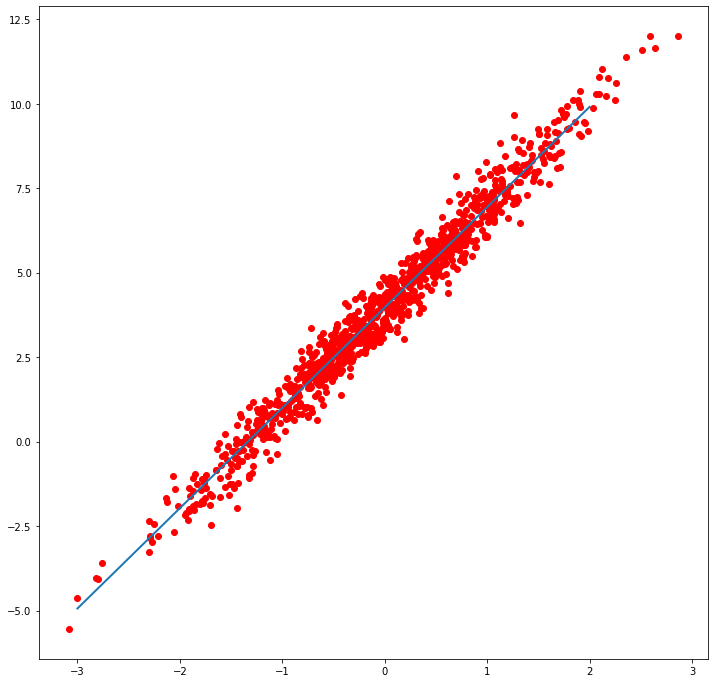

In [ ]:
np.random.seed(7)

X = np.random.randn(1000, 1)
y = 4 + 3*X + 0.5*np.random.randn(1000, 1)

ones = np.ones((X.shape[0], 1), dtype = np.uint8)
Xbar = np.concatenate((ones, X), axis = 1)

# Work with Normal Equlization
# A = Xbar.T.dot(Xbar)
# B = Xbar.T.dot(y)
# ws = np.linalg.pinv(A).dot(B)

# Work with Gradient Descent
def grad(w):
  N = Xbar.shape[0]
  return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

w_init = np.array([[2,1]]).T
w = [w_init]
eta = 1
for i in range(100):
  w_new = w[-1] - eta*grad(w[-1])
  if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
    break

  w.append(w_new)

ws = w[-1]


b = ws[0,0]
w = ws[1,0]
x0 = np.array([int(np.min(X, axis=0)), int(np.max(X, axis=0))])
y0 = x0.T*w + b

print(ws)
plt.figure(figsize=(12,12))
plt.plot(X, y, 'ro')
plt.plot(x0, y0, linewidth=2)
plt.show()

In [ ]:
a = np.array([[1],[2]])
b = np.array([2,3])
print(a.shape, b.shape, (a-b).shape)
print(a-b)

(2, 1) (2,) (2, 2)
[[-1 -2]
 [ 0 -1]]
